<a href="https://colab.research.google.com/github/lucaslattari/Python_OpenCV4/blob/master/03_videos_resize_overlay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://universodiscreto.com/circle-ud.png"/></center>

# 1. Processamento de Vídeos usando OpenCV

Nesse notebook serão inseridos exemplos que foram discutidos na live apresentada nesse link: https://www.youtube.com/watch?v=8TOH40sq-C0

In [0]:
import numpy as np
import cv2

Na célula abaixo faremos o download de um vídeo para usá-lo nesse ambiente.

In [0]:
!wget http://www.universodiscreto.com/OpenCV/corona.mkv

--2020-03-28 14:53:18--  http://www.universodiscreto.com/OpenCV/corona.mkv
Resolving www.universodiscreto.com (www.universodiscreto.com)... 162.241.3.14
Connecting to www.universodiscreto.com (www.universodiscreto.com)|162.241.3.14|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.universodiscreto.com/OpenCV/corona.mkv [following]
--2020-03-28 14:53:19--  https://www.universodiscreto.com/OpenCV/corona.mkv
Connecting to www.universodiscreto.com (www.universodiscreto.com)|162.241.3.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10529053 (10M) [video/x-matroska]
Saving to: ‘corona.mkv.2’

corona.mkv.2        100%[===================>]  10.04M  24.0MB/s    in 0.4s    

2020-03-28 14:53:19 (24.0 MB/s) - ‘corona.mkv.2’ saved [10529053/10529053]



A célula abaixo verifica se o vídeo foi carregado corretamente. Se sim, a célula retornará 'true'.

In [0]:
import os.path
os.path.isfile('corona.mkv')

True

Aqui embaixo temos um laço que percorrerá 200 frames do vídeo 'corona.mkv'. Para cada frame, vamos redimensionar a referida imagem para 640x480 e girarmos o frame em questão. Esses 200 frames serão salvos em outro arquivo de vídeo, chamado 'output.avi'.

In [0]:
cap = cv2.VideoCapture('corona.mkv')

fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))
frames = 0

while(cap.isOpened()):
  ret, frame = cap.read()

  if not ret or frames >= 200:
    print("FINISHED!")
    break

  #redimensionamos a imagem
  newFrame = cv2.resize(frame, (640, 480), interpolation = cv2.INTER_AREA)

  #giramos a imagem
  newFrame = cv2.flip(newFrame, 0)
  out.write(newFrame)
  frames += 1

cap.release()
out.release()

FINISHED!


Novamente verificamos se o arquivo de vídeo foi criado com sucesso.

In [0]:
import os.path
os.path.isfile('output.avi')

True

Finalmente fazemos o download dele e verificamos se o mesmo foi processado corretamente.

In [0]:
from google.colab import files
files.download('output.avi') 

# 2. Sobreposição de imagens

In [0]:
#esse código só serve pra ser uma função que exibe imagens
def showImage(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)

Começamos carregando as duas imagem em que faremos a sobreposição.

In [1]:
!wget http://www.universodiscreto.com/OpenCV/ARTIGOS.jpg
!wget http://www.universodiscreto.com/OpenCV/logosvbr.png

--2020-03-28 21:41:16--  http://www.universodiscreto.com/OpenCV/ARTIGOS.jpg
Resolving www.universodiscreto.com (www.universodiscreto.com)... 162.241.3.14
Connecting to www.universodiscreto.com (www.universodiscreto.com)|162.241.3.14|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.universodiscreto.com/OpenCV/ARTIGOS.jpg [following]
--2020-03-28 21:41:17--  https://www.universodiscreto.com/OpenCV/ARTIGOS.jpg
Connecting to www.universodiscreto.com (www.universodiscreto.com)|162.241.3.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530915 (518K) [image/jpeg]
Saving to: ‘ARTIGOS.jpg’

ARTIGOS.jpg         100%[===================>] 518.47K   613KB/s    in 0.8s    

2020-03-28 21:41:19 (613 KB/s) - ‘ARTIGOS.jpg’ saved [530915/530915]

--2020-03-28 21:41:21--  http://www.universodiscreto.com/OpenCV/logosvbr.png
Resolving www.universodiscreto.com (www.universodiscreto.com)... 162.241.3.14
Connecting to www.univer

As duas imagens encontram-se exibidas abaixo.

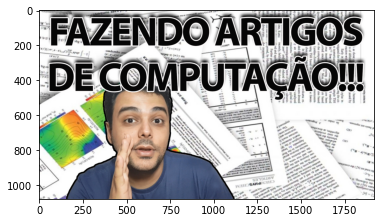

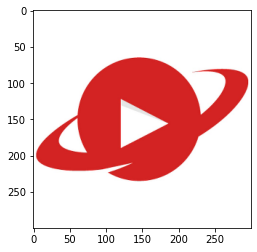

In [21]:
from matplotlib import pyplot as plt
thumbnail = cv2.imread('ARTIGOS.jpg')
plt.figure()
showImage(thumbnail)

logo = cv2.imread('logosvbr.png')
plt.figure()
logo = cv2.resize(logo, (300, 300))
showImage(logo)

O objetivo aqui é fazer o logo do Science Vlogs Brasil aparecer no canto inferior direito da thumbnail de um vídeo antigo meu.

Com o crop (recortar região de interesse) pegamos a região da imagem da thumbnail em que o logo do SVBR será inserido.

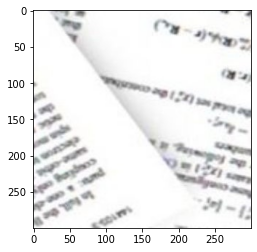

In [18]:
thumbH, thumbW, _ = thumbnail.shape
logoH, logoW, _ = logo.shape

crop = thumbnail[thumbH - logoH:, thumbW - logoW:]
showImage(crop)

Transformamos o logo em imagem com tons de cinza e criamos uma máscara binária da mesma com a binarização (cv2.threshold)

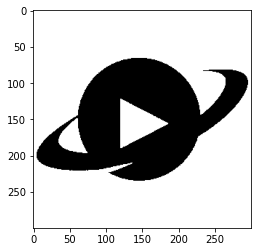

In [19]:
logoGray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
ret, maskLogo = cv2.threshold(logoGray, 100, 255, cv2.THRESH_BINARY)
showImage(maskLogo)

Agora aplicamos uma operação de AND binário na imagem recortada 'crop'. No caso, realizar a operação binária entre a mesma imagem não terá efeito. Só que, com a inclusão da máscara no terceiro parâmetro, os pixels pretos de maskLogo serão ignorados e, portanto, ficarão escuros. Com isso temos a marcação em que vamos incluir o logo posteriormente.

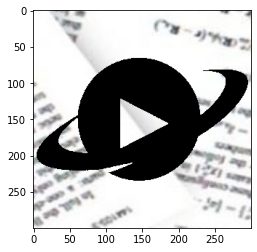

In [22]:
fundo = cv2.bitwise_and(crop, crop, mask = maskLogo)
showImage(fundo)

Algo parecido é feito abaixo, mas aplicamos a máscara inversa no logo.

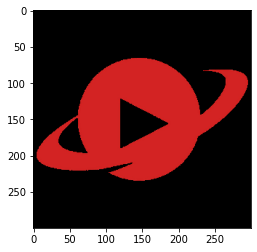

In [23]:
maskLogoInv = cv2.bitwise_not(maskLogo)
frente = cv2.bitwise_and(logo, logo, mask = maskLogoInv)
showImage(frente)

Faremos a composição entre 'frente' e 'fundo', compondo o logo na imagem extraída da thumbnail.

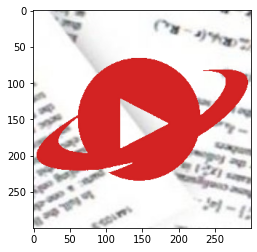

In [24]:
imgJunta = cv2.add(frente, fundo)
showImage(imgJunta)

Adicionamos a imagem gerada na thumbnail final.

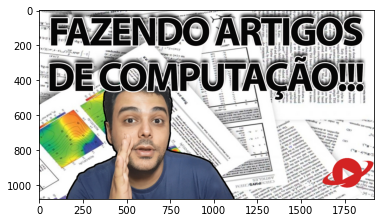

In [25]:
thumbnail[thumbH - logoH:, thumbW - logoW:] = imgJunta
showImage(thumbnail)